# Part 1 : the perception

## Task 1 
 Generate a dataset of points in $R^2$. To do this, define two Gaussian distributions and sample 100 points from each.
 Your dataset should then contain a total of 200 points, 100 from each distribution. Keep 80 points per distribution
 as the training (160 in total), 20 for the test (40 in total).

fistly, use `numpy.random.multivate_normal()` to sample from a two-dimensional Gaussian distribution.

In [1]:
import numpy as np

def generate_data(mean1, cov1, mean2, cov2, n_samples=100):
    # sample from two Gaussian distributions
    # features shape: (100, 2)
    samples1 = np.random.multivariate_normal(mean1, cov1, 100)
    samples2 = np.random.multivariate_normal(mean2, cov2, 100)
    print(samples1.shape)

    # labels shape: (100,)
    labels1 = -np.ones(100)
    labels2 = np.ones(100)
    print(labels1.shape)

    # combine the two classes
    X = np.vstack([samples1, samples2])
    y = np.hstack([labels1, labels2])
    print(X.shape, y.shape)
    return X, y, samples1, samples2, labels1, labels2


In [2]:
mean1 = [-2, -2]
cov1 = [[1, 0], [0, 1]]
mean2 = [2, 2]
cov2 = [[1, 0.5], [0.5, 1]]
X, y, samples1, samples2, labels1, labels2 = generate_data(mean1, cov1, mean2, cov2)

print(f"data points: {len(X)}")
print(f"distribution 1: {len(samples1)}")
print(f"distribution 2: {len(samples2)}")
print(f"feature dimension: {X.shape[1]}")

(100, 2)
(100,)
(200, 2) (200,)
data points: 200
distribution 1: 100
distribution 2: 100
feature dimension: 2


use matplotlib to visualize the data

In [3]:
import matplotlib.pyplot as plt
def plot_dataset(samples1, samples2, mean1, mean2):
    plt.figure(figsize=(10, 8))
    plt.scatter(samples1[:, 0], samples1[:, 1], c='red', marker='o', label='Distribution 1', alpha=0.7)
    plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', marker='s', label='Distribution 2', alpha=0.7)

    plt.scatter(mean1[0], mean1[1], c='darkred', marker='*', s=200, label='Mean 1')
    plt.scatter(mean2[0], mean2[1], c='darkblue', marker='*', s=200, label='Mean 2')

    plt.title('Generated Dataset from Two Gaussian Distributions')
    plt.xlabel('X1 coordinate')
    plt.ylabel('X2 coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

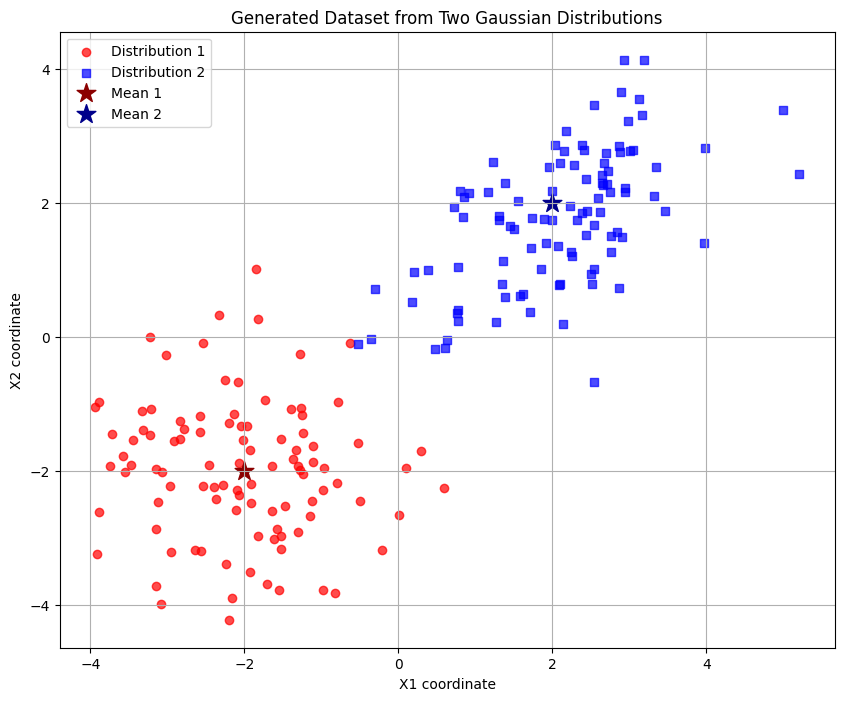

In [4]:
plot_dataset(samples1, samples2, mean1, mean2)

Then, we use `train_test_split()` in sickit-learn to split the data into training and testing sets.

In [5]:
from sklearn.model_selection import train_test_split
def split_dataset(samples1, labels1, samples2, labels2):
    X1_train, X1_test, y1_train, y1_test = train_test_split(samples1, labels1, train_size=80, test_size=20, random_state=42)
    X2_train, X2_test, y2_train, y2_test = train_test_split(samples2, labels2, train_size=80, test_size=20, random_state=42)

    # combine the two classes
    X_train = np.vstack([X1_train, X2_train])
    y_train = np.hstack([y1_train, y2_train])
    print(X_train.shape, y_train.shape)

    X_test = np.vstack([X1_test, X2_test])
    y_test = np.hstack([y1_test, y2_test])
    print(X_test.shape, y_test.shape)
    return X1_train, X1_test, X2_train, X2_test, X_train, y_train, X_test, y_test

In [6]:
X1_train, X1_test, X2_train, X2_test, X_train, y_train, X_test, y_test = split_dataset(samples1, labels1, samples2, labels2)
print("split the dataset:")
print(f"training set: {len(X_train)} points ({len(X1_train)} from distribution 1, {len(X2_train)} from distribution 2)")
print(f"test set: {len(X_test)} points ({len(X1_test)} from distribution 1, {len(X2_test)} from distribution 2)")

(160, 2) (160,)
(40, 2) (40,)
split the dataset:
training set: 160 points (80 from distribution 1, 80 from distribution 2)
test set: 40 points (20 from distribution 1, 20 from distribution 2)


## Task 2
 Implement the perceptron following the specs in perceptron.py and the pseudocode in perceptronslides.pdf
 

Note that I add a batch_size param to support mini-batch gradient descent.

In [7]:
class Perceptron():
    def __init__(self, n_inputs, max_epochs=3, learning_rate=0.001, batch_size=32):
        self.n_inputs = n_inputs  # Fill in: Initialize number of inputs
        self.max_epochs = max_epochs  # Fill in: Initialize maximum number of epochs
        self.learning_rate = learning_rate # Fill in: Initialize learning rate
        self.batch_size = batch_size # Mini-batch size
        self.weights = np.zeros((self.n_inputs + 1, 1)) 

    def forward(self, input_vec): 
        return np.sign(input_vec @ self.weights).flatten()
    
    def train(self, training_inputs, labels):
        print('Start training...')
        # Add bias term to training inputs
        ones = np.ones((training_inputs.shape[0], 1))
        training_inputs_with_bias = np.concatenate((training_inputs, ones), axis=1)
        
        for epoch in range(self.max_epochs): 
            # Shuffle the data
            indices = np.arange(training_inputs_with_bias.shape[0])
            np.random.shuffle(indices)
            training_inputs_shuffled = training_inputs_with_bias[indices]
            labels_shuffled = labels[indices]
            
            misclassified_count = 0
            running_misclassified = 0

            loss = 0
            running_loss = 0

            # Process mini-batches
            for i in range(0, len(training_inputs_shuffled), self.batch_size):
                # Get mini-batch
                batch_inputs = training_inputs_shuffled[i:i+self.batch_size]
                batch_labels = labels_shuffled[i:i+self.batch_size]
                
                # Forward pass
                predictions = self.forward(batch_inputs)  
                
                # Calculate misclassified mask
                misclassified_mask = (predictions * batch_labels <= 0)

                running_misclassified += np.sum(misclassified_mask)
                misclassified_count += running_misclassified
                
                if np.any(misclassified_mask):
                    misclassified_inputs = batch_inputs[misclassified_mask]
                    misclassified_labels = batch_labels[misclassified_mask]

                    # calculate loss
                    running_loss = -np.sum(misclassified_labels * (misclassified_inputs @ self.weights).flatten())
                    loss += running_loss
                    # Compute gradient for misclassified samples
                    gradient = -np.sum(misclassified_labels[:, np.newaxis] * misclassified_inputs, axis=0)
                    
                    # Update weights using gradient descent
                    self.weights -= self.learning_rate * gradient[:, np.newaxis]
                print(f'Step{i+self.batch_size}/{training_inputs_with_bias.shape[0]}, loss:{running_loss:.5f}')

            print(f'Epoch {epoch + 1}/{self.max_epochs}, loss:{loss:.5f}, misclassify {misclassified_count} samples')
            
    def test(self, test_inputs, test_labels):
        ones = np.ones((test_inputs.shape[0], 1))
        test_inputs_with_bias = np.concatenate((test_inputs, ones), axis=1)
        test_predictions = self.forward(test_inputs_with_bias)
        misclassified_count = np.sum(test_predictions * test_labels <= 0)
        accuracy = 1 - misclassified_count / test_inputs.shape[0]
        print(f'Test accuracy: {accuracy:.2f}')

Now let implement the perceptron class. Note that the input shape is (n_samples, n_input), and the weright$bias shape is (n_input, 1).

## Task3
 Train the perceptron on the training data (160 points) and test on the remaining 40 test points. Compute the classification accuracy on the test set.

In [8]:
net = Perceptron(n_inputs=2)

net.train(X_train,y_train)

Start training...
Step32/160, loss:-0.00000
Step64/160, loss:-0.00000
Step96/160, loss:-0.00000
Step128/160, loss:-0.00000
Step160/160, loss:-0.00000
Epoch 1/3, loss:0.00000, misclassify 160 samples
Step32/160, loss:0.00000
Step64/160, loss:0.00000
Step96/160, loss:0.00000
Step128/160, loss:0.00000
Step160/160, loss:0.00000
Epoch 2/3, loss:0.00000, misclassify 0 samples
Step32/160, loss:0.00000
Step64/160, loss:0.00000
Step96/160, loss:0.00000
Step128/160, loss:0.00000
Step160/160, loss:0.00000
Epoch 3/3, loss:0.00000, misclassify 0 samples


In [9]:
net.test(X_test, y_test)

Test accuracy: 0.95


In [10]:
net.weights

array([[0.06083054],
       [0.06036374],
       [0.        ]])

Let visualize the classification boundary.

In [11]:
def plot_decision_boundary(net, X1_train, X1_test, X2_train, X2_test):
    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plt.scatter(X1_train[:, 0], X1_train[:, 1], c='red', marker='o', label='Distribution 1', alpha=0.7)
    plt.scatter(X2_train[:, 0], X2_train[:, 1], c='blue', marker='s', label='Distribution 2', alpha=0.7)
    plt.title('Train dataset')

    w1, w2, b = net.weights.flatten()
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = -(w1 * x_vals + b) / w2
    plt.plot(x_vals, y_vals, c='green', label='Decision Boundary')

    plt.subplot(122)
    plt.scatter(X1_test[:, 0], X1_test[:, 1], c='red', marker='o', label='Distribution 1', alpha=0.7)
    plt.scatter(X2_test[:, 0], X2_test[:, 1], c='blue', marker='s', label='Distribution 2', alpha=0.7)
    plt.title('Test dataset')

    w1, w2, b = net.weights.flatten()
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = -(w1 * x_vals + b) / w2
    plt.plot(x_vals, y_vals, c='green', label='Decision Boundary')

    plt.tight_layout()
    plt.show()

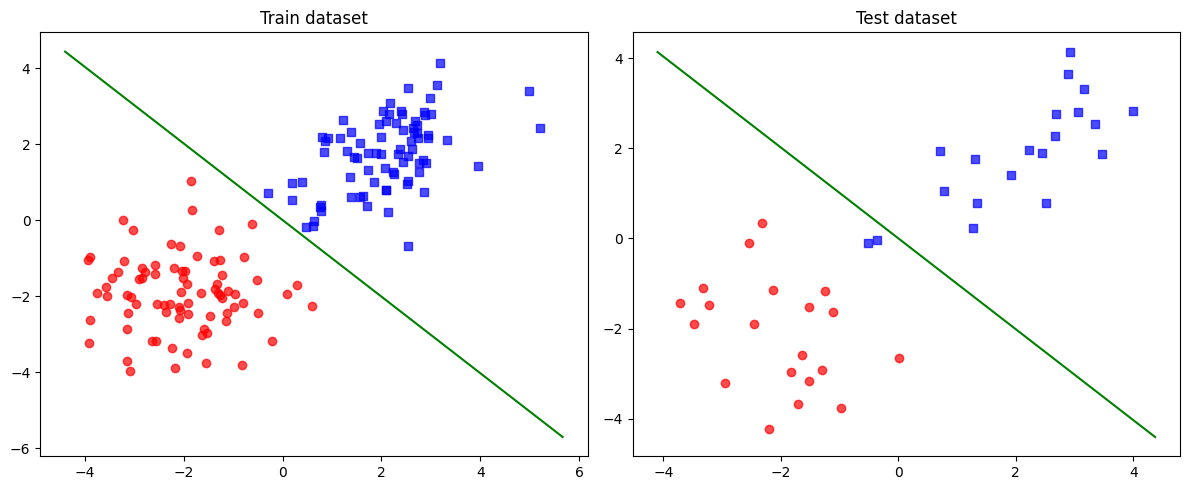

In [12]:
plot_decision_boundary(net, X1_train, X1_test, X2_train, X2_test)

## Task4
 Experiment with different sets of points (generated as described in Task 1). What happens during the training if
 the means of the two Gaussians are too close and/or if their variance is too high?

Intuitivily, if the two Gaussians' means are two close or their vaiance is too large, they may not be linearly separable since the overlapping of probability distribution become larger.

Let first try to move one distribution centered at (-2,2) to (0,0), closer to the one ceter at (2,2).

In [13]:
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [2, 2]
cov2 = [[1, 0.5], [0.5, 1]]
X, y, samples1, samples2, labels1, labels2 = generate_data(mean1, cov1, mean2, cov2)

print(f"data points: {len(X)}")
print(f"distribution 1: {len(samples1)}")
print(f"distribution 2: {len(samples2)}")
print(f"feature dimension: {X.shape[1]}")

(100, 2)
(100,)
(200, 2) (200,)
data points: 200
distribution 1: 100
distribution 2: 100
feature dimension: 2


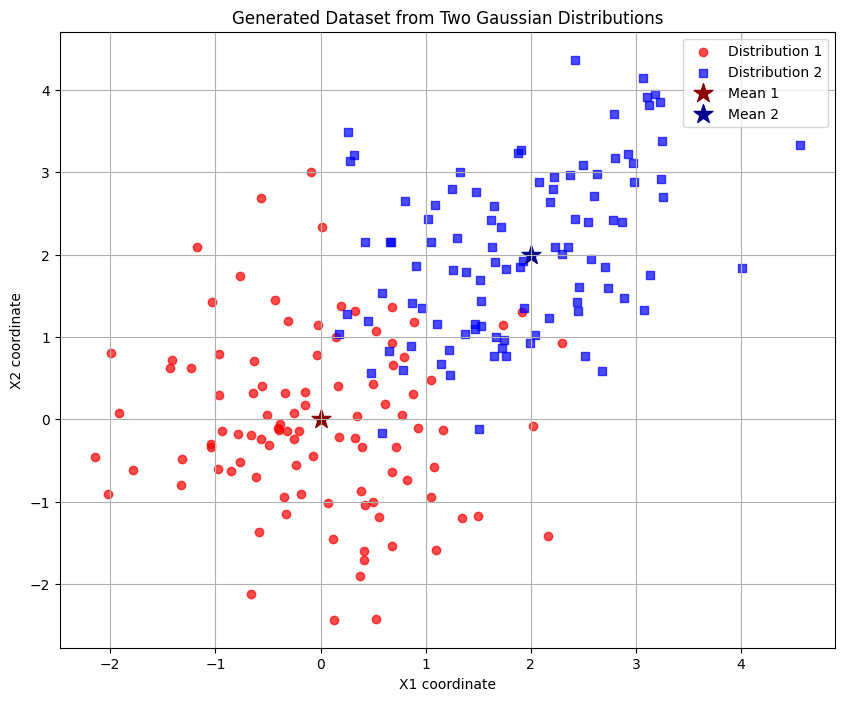

In [14]:
plot_dataset(samples1, samples2, mean1, mean2)

In [15]:
X1_train, X1_test, X2_train, X2_test, X_train, y_train, X_test, y_test = split_dataset(samples1, labels1, samples2, labels2)
print("split the dataset:")
print(f"training set: {len(X_train)} points ({len(X1_train)} from distribution 1, {len(X2_train)} from distribution 2)")
print(f"test set: {len(X_test)} points ({len(X1_test)} from distribution 1, {len(X2_test)} from distribution 2)")

(160, 2) (160,)
(40, 2) (40,)
split the dataset:
training set: 160 points (80 from distribution 1, 80 from distribution 2)
test set: 40 points (20 from distribution 1, 20 from distribution 2)


In [16]:
net = Perceptron(n_inputs=2,max_epochs=10)

net.train(X_train, y_train)

Start training...
Step32/160, loss:-0.00000
Step64/160, loss:0.17060
Step96/160, loss:0.02545
Step128/160, loss:0.12739
Step160/160, loss:0.00505
Epoch 1/10, loss:0.32849, misclassify 212 samples
Step32/160, loss:0.02782
Step64/160, loss:0.01274
Step96/160, loss:0.02018
Step128/160, loss:0.01084
Step160/160, loss:0.03231
Epoch 2/10, loss:0.10390, misclassify 43 samples
Step32/160, loss:0.04876
Step64/160, loss:0.00212
Step96/160, loss:0.02109
Step128/160, loss:0.00651
Step160/160, loss:0.00551
Epoch 3/10, loss:0.08398, misclassify 38 samples
Step32/160, loss:0.00962
Step64/160, loss:0.01449
Step96/160, loss:0.00746
Step128/160, loss:0.01646
Step160/160, loss:0.01293
Epoch 4/10, loss:0.06096, misclassify 38 samples
Step32/160, loss:0.01461
Step64/160, loss:0.06995
Step96/160, loss:0.02159
Step128/160, loss:0.02343
Step160/160, loss:0.01107
Epoch 5/10, loss:0.14065, misclassify 68 samples
Step32/160, loss:0.01463
Step64/160, loss:0.00538
Step96/160, loss:0.01174
Step128/160, loss:0.04265

We can see that the perceptron fail to classify all the training data, and its loss function fail to converge, which means that the perceptron is not able to find a separating hyperplane for the all training data.

In [17]:
net.test(X_test, y_test)

Test accuracy: 0.93


In [18]:
net.weights

array([[ 0.00757384],
       [ 0.00451518],
       [-0.013     ]])

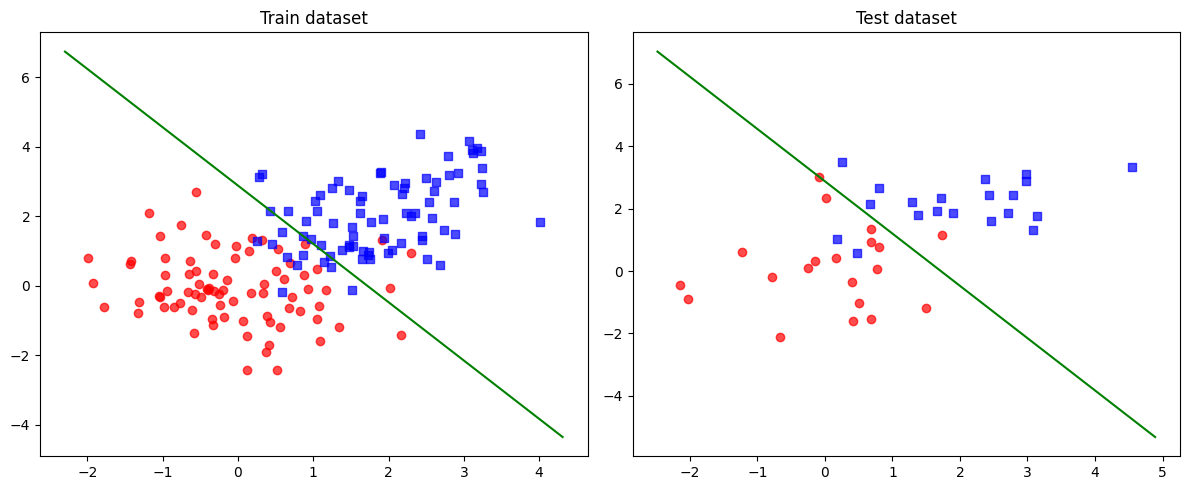

In [19]:
plot_decision_boundary(net, X1_train, X1_test, X2_train, X2_test)

What would happen when we increase the variance of two Gaussian is simmilar as illustated above. In the below we increase the variance of the two Gaussians from 1 to 3.

In [20]:
mean1 = [-2, -2]
cov1 = [[3, 0], [0, 3]]
mean2 = [2, 2]
cov2 = [[3, 0.5], [0.5, 3]]
X, y, samples1, samples2, labels1, labels2 = generate_data(mean1, cov1, mean2, cov2)

print(f"data points: {len(X)}")
print(f"distribution 1: {len(samples1)}")
print(f"distribution 2: {len(samples2)}")
print(f"feature dimension: {X.shape[1]}")

(100, 2)
(100,)
(200, 2) (200,)
data points: 200
distribution 1: 100
distribution 2: 100
feature dimension: 2


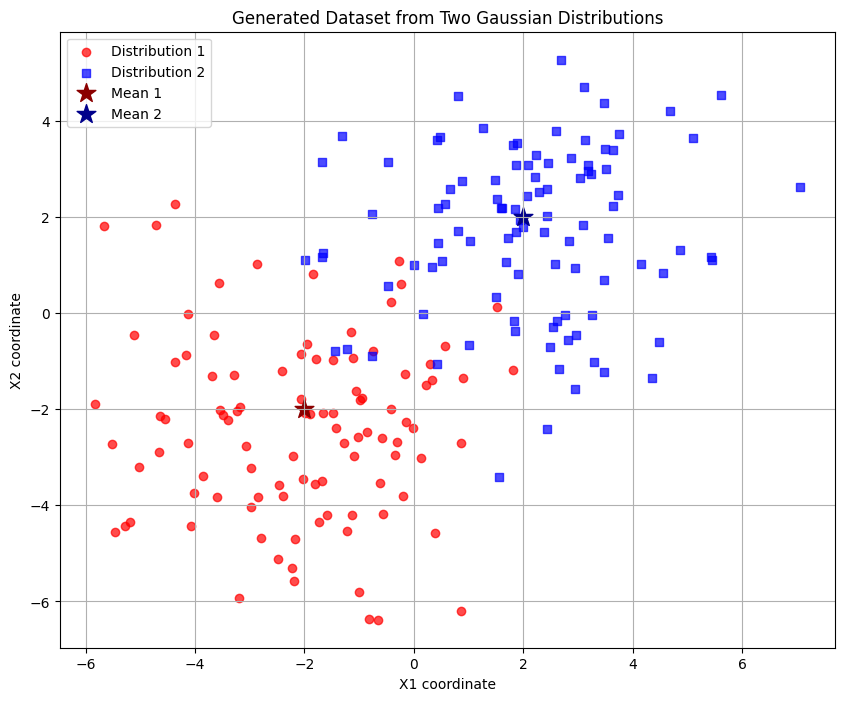

In [21]:
plot_dataset(samples1, samples2, mean1, mean2)

In [22]:
X1_train, X1_test, X2_train, X2_test, X_train, y_train, X_test, y_test = split_dataset(samples1, labels1, samples2, labels2)
print("split the dataset:")
print(f"training set: {len(X_train)} points ({len(X1_train)} from distribution 1, {len(X2_train)} from distribution 2)")
print(f"test set: {len(X_test)} points ({len(X1_test)} from distribution 1, {len(X2_test)} from distribution 2)")

(160, 2) (160,)
(40, 2) (40,)
split the dataset:
training set: 160 points (80 from distribution 1, 80 from distribution 2)
test set: 40 points (20 from distribution 1, 20 from distribution 2)


In [23]:
net = Perceptron(n_inputs=2,max_epochs=10)

net.train(X_train, y_train)

Start training...
Step32/160, loss:-0.00000
Step64/160, loss:0.12596
Step96/160, loss:0.27759
Step128/160, loss:0.15941
Step160/160, loss:0.04602
Epoch 1/10, loss:0.60898, misclassify 183 samples
Step32/160, loss:0.19372
Step64/160, loss:0.19372
Step96/160, loss:0.34960
Step128/160, loss:0.01621
Step160/160, loss:0.14163
Epoch 2/10, loss:0.70117, misclassify 28 samples
Step32/160, loss:0.18732
Step64/160, loss:0.03849
Step96/160, loss:0.02792
Step128/160, loss:0.40473
Step160/160, loss:0.40473
Epoch 3/10, loss:0.65845, misclassify 25 samples
Step32/160, loss:0.23972
Step64/160, loss:0.14357
Step96/160, loss:0.00167
Step128/160, loss:0.17385
Step160/160, loss:0.01439
Epoch 4/10, loss:0.57320, misclassify 31 samples
Step32/160, loss:0.12937
Step64/160, loss:0.12937
Step96/160, loss:0.05164
Step128/160, loss:0.10943
Step160/160, loss:0.23799
Epoch 5/10, loss:0.52842, misclassify 29 samples
Step32/160, loss:0.00632
Step64/160, loss:0.11115
Step96/160, loss:0.12604
Step128/160, loss:0.01442

In [24]:
net.test(X_test, y_test)

Test accuracy: 0.90


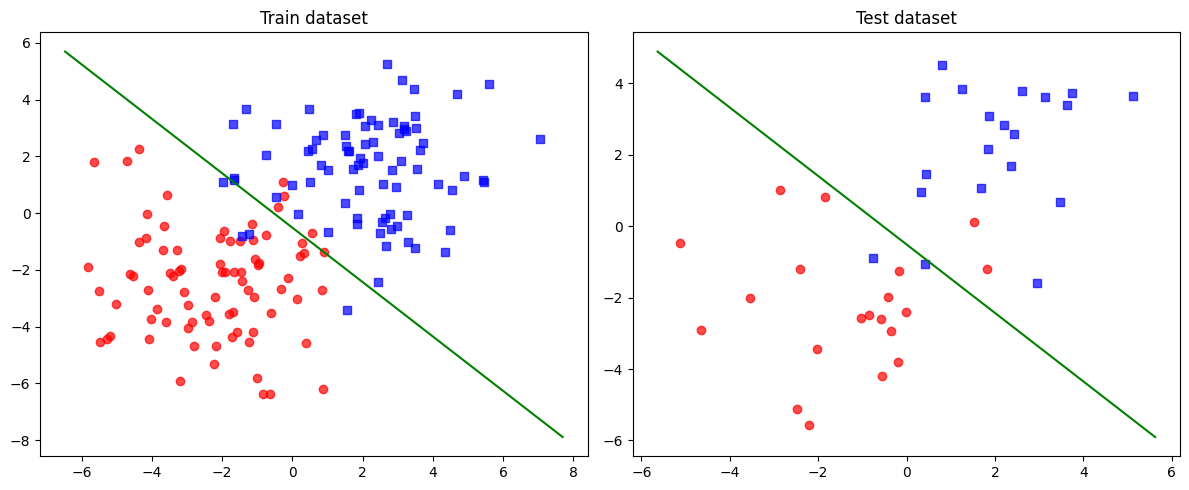

In [25]:
plot_decision_boundary(net, X1_train, X1_test, X2_train, X2_test)